My dataset was arrests, and the goal was to find the neighborhood with the fewest arrests. However, I felt the data would bve a lot more relevantt if I found the number of arrests per capita, so I included a second dataset that includes the populations of each neighborhood from the 2020 census.

In [7]:
import pandas as pd
import geopandas
%matplotlib inline

arrest = pd.read_csv("arrests.csv")

In [8]:
populations = pd.read_csv("censusdata.csv")

I needed a way to create a data structure that had the number of arrests per capita in each neighborhood that could be displayed on a map. The neighborhoods listed in each dataset varied slightly, so I created a dictionary that conatained only the ones in the census and checked if the neighborhood for each arrest was in that dictionary.

Each arrest was a single entry in the dataset, so to be able to sum them up, I overwrote the Arrest ID (which wouldn't be necessary to make use of the dataset) with 1 / the neighborhood's population. If the neighborhood wasn't in the dictionary, I overwrote it with a 0 so that entry could be removed with a mask.

In addition to removing the entries from neighborhoods that weren't in both datasets, I removed 3 neighborhoods from the dataset: Chateau, North Shore, and South Shore. These neighborhoods were outliers and had very high numbers of per capita arrests due to having very few residents and instead things like sports stadiums and casinos. The inclusion of these neighborhoods made the map very hard to read, and I felt that they weren't relevant for our purposes anyway, so I removed them.

In [9]:
populationdict = {}

for index, row in populations.iterrows():
    populationdict[populations.iloc[index, 0]] = populations.iloc[index, 11]

In [10]:

for index, row in arrest.iterrows():
    try:
        arrest.iloc[index, 0] = 1/populationdict[arrest.loc[index, 'INCIDENTNEIGHBORHOOD']]
    except:
        arrest.iloc[index, 0] = 0
        
mask1 = arrest["PK"] != 0
arrest_capita = arrest[mask1]
mask2 = arrest_capita['INCIDENTNEIGHBORHOOD'] != "Chateau"
arrest_capita = arrest_capita[mask2]
mask3 = arrest_capita['INCIDENTNEIGHBORHOOD'] != "South Shore"
arrest_capita = arrest_capita[mask3]
mask4 = arrest_capita['INCIDENTNEIGHBORHOOD'] != "North Shore"
arrest_capita = arrest_capita[mask4]

num_arrests = arrest_capita.groupby("INCIDENTNEIGHBORHOOD").sum()['PK']
num_arrests.sort_values(ascending=False)

INCIDENTNEIGHBORHOOD
West End               1.297561
Homewood West          1.140187
East Allegheny         1.057278
Homewood South         0.858850
Allegheny Center       0.831572
                         ...   
North Oakland          0.038256
Regent Square          0.036045
Swisshelm Park         0.029873
Squirrel Hill North    0.022645
Central Northside      0.007739
Name: PK, Length: 82, dtype: float64

I then created the map using the neighborhoods files. The grey neighborhoods are the ones that either weren't in both datasets, or I chose to exclude.


In [12]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [13]:

arrests_map = neighborhoods.merge(num_arrests, how='left', left_on='hood', right_on='INCIDENTNEIGHBORHOOD')

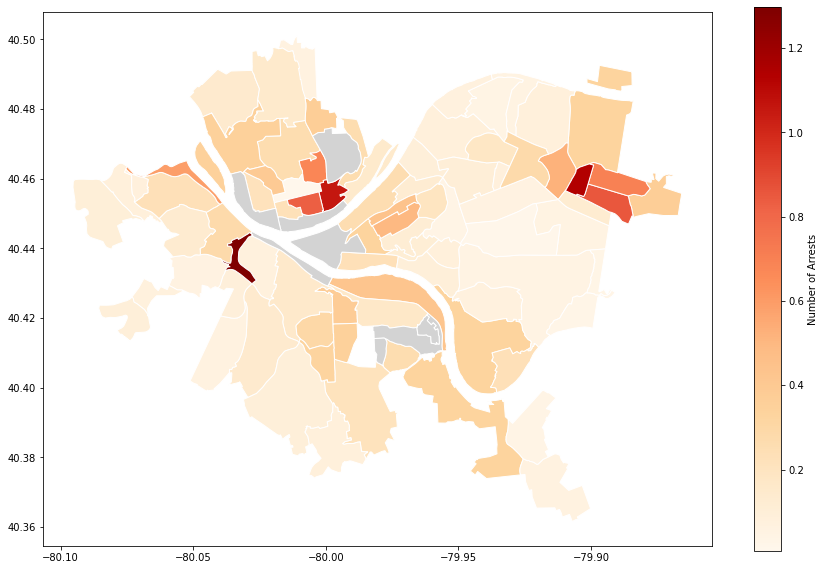

In [14]:
arrests_map.plot(column='PK', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the neighborhoods in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"}) # set neighborhoods with no data to gray
  

The 5 lowest neighborhoods were:

1. North Oakland          0.038256
2. Regent Square          0.036045
3. Swisshelm Park         0.029873
4. Squirrel Hill North    0.022645
5. Central Northside      0.007739

I'd say that North Oakland and Squirell Hill are two of my favorite neighborhoods, so i'd say that this dataset lines up fairly well with my personal favorite neighborhoods. I'm not really familiar with the other 3 neighborhoods in the lowest 5.